EXPERIMENT 6 :- Implement program to apply moving average smoothing for data preparation and time series forecasting

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/trends.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe


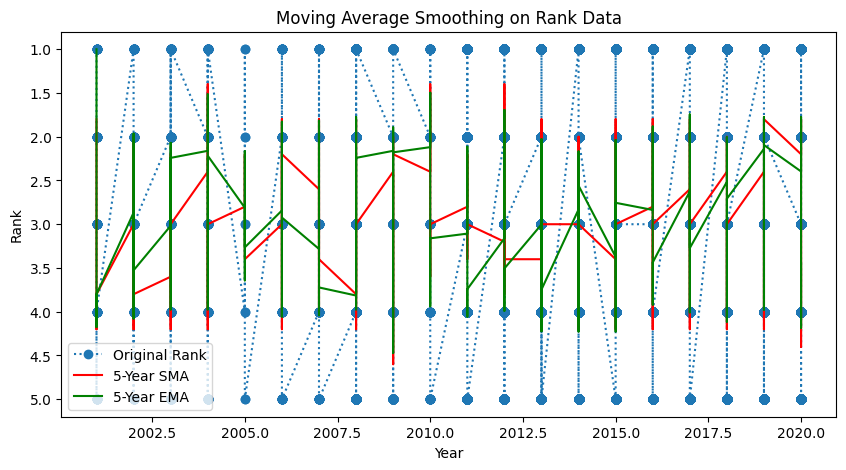

Smoothed data saved to /content/trends_smoothed.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/trends.csv"
df = pd.read_csv(file_path)

# Sort by YEAR (if not already sorted)
df = df.sort_values(by='year')

# Apply a 5-year simple moving average to RANK
df['SMA_5'] = df['rank'].rolling(window=5).mean()

# Apply Exponential Moving Average (EMA) for better trend smoothing
df['EMA_5'] = df['rank'].ewm(span=5, adjust=False).mean()

# Plot original and smoothed RANK over YEAR
plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['rank'], label="Original Rank", linestyle='dotted', marker='o')
plt.plot(df['year'], df['SMA_5'], label="5-Year SMA", color='red')
plt.plot(df['year'], df['EMA_5'], label="5-Year EMA", color='green')
plt.gca().invert_yaxis()  # Assuming lower RANK is better
plt.legend()
plt.title("Moving Average Smoothing on Rank Data")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.show()

# Save the processed file
output_path = "/content/trends_smoothed.csv"
df.to_csv(output_path, index=False)

print(f"Smoothed data saved to {output_path}")
